<a href="https://colab.research.google.com/github/FabianaCouvaspelima/15-m-dulo-gip/blob/main/Estat%C3%ADstica_Fabiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOSTRANDO DADOS DA TABELA E SUAS INFORMAÇÕES

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


dados= pd.read_csv('/content/drive/MyDrive/ data.csv',encoding='latin-1')
display(dados)

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total
0,2019-01-01,349184,0,4693,0,46739,4693
1,2019-01-02,867328,0,8501,0,83129,8501
2,2019-01-03,758590,0,9375,0,86067,9375
3,2019-01-04,688873,0,8405,0,69363,8405
4,2019-01-05,441760,0,6136,0,56183,6136
...,...,...,...,...,...,...,...
634,2020-09-26,2509687,1580,15320,9292,96178,16900
635,2020-09-27,2182679,1838,14135,10052,103494,15973
636,2020-09-28,3496475,2684,21724,11224,127524,24407
637,2020-09-29,4519732,3037,28017,11570,150116,31053


MOSTRA O TIPO DE DADOS

Aqui estamos exibindo informações sobre o DataFrame com o números de linhas e colunas, o tipo de armazenamento em cada coluna e a quantidade de valores não nulos. Aqui nessas informações nota-se que data está como 'object', que é o formato padrão de valores de data e hora que são lidos de um arquivo csv. No entanto esse formato pode ser problemático para trabalhar com data, pois não permite a realização de operações matemáticas ou de comparações com outras datas.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data              639 non-null    object
 1   receita           639 non-null    int64 
 2   transacoes_blog   639 non-null    int64 
 3   transacoes_site   639 non-null    int64 
 4   usuarios_blog     639 non-null    int64 
 5   usuarios_site     639 non-null    int64 
 6   transacoes_total  639 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 35.1+ KB


Formatação de datas

A função "pd.to_datetime" é usada para converter uma série de strings ou números em objetos de data/hora do tipo "datetime". Ao aplicar essa função à coluna "data" do objeto "dados", a coluna será convertida em objetos de data/hora do tipo "datetime", o que permitirá que o usuário trabalhe com esses valores de data/hora de forma mais conveniente.

In [ ]:

dados["data"] = pd.to_datetime(dados['data'])


Aqui estou fornecendo através da função dados.describe() um resumo estatístico dos dados em um DataFrame, incluindo medidas de tendência central, dispersão e distribuição dos dados em cada coluna.

In [ ]:
dados.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total
count,6.390000e+02,639.000000,639.000000,639.000000,639.000000,639.000000
mean,1.623891e+06,528.350548,19039.140845,1439.848200,101610.485133,19567.500782
std,1.160581e+06,1201.781347,13677.729723,3369.872063,37240.234152,13812.647352
min,3.208500e+04,0.000000,3557.000000,0.000000,26298.000000,3557.000000
25%,8.073420e+05,0.000000,11013.000000,0.000000,77727.000000,11042.500000
50%,1.263161e+06,0.000000,16069.000000,0.000000,96104.000000,16392.000000
75%,2.232770e+06,0.000000,22606.500000,0.000000,117586.500000,24410.000000
max,1.226684e+07,5586.000000,188955.000000,13059.000000,369989.000000,188955.000000


MOSTRA O TIPO DE DADOS DEPOIS DA CONVERÇÃO OBJECT PARA DATATIME

Aqui ja é possível manipular e analisar os dados de forma eficiente, pois foi feita a conversão do formato objecto para datetime, é uma etapa importante ao trabalhar com dados de data e hora, pois permite uma manipulação mais flexivel desses dados.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              639 non-null    datetime64[ns]
 1   receita           639 non-null    int64         
 2   transacoes_blog   639 non-null    int64         
 3   transacoes_site   639 non-null    int64         
 4   usuarios_blog     639 non-null    int64         
 5   usuarios_site     639 non-null    int64         
 6   transacoes_total  639 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 35.1 KB


In [ ]:
dados.set_index('data', inplace=True)

O efeito dessa transformação é a criação de um novo index do tipo DatetimeIndex
Dessa forma, a linha de código dados.set_index('data', inplace=True) está definindo a coluna 'data' como o índice do DataFrame 'dados', ou seja, cada linha será identificada pela data correspondente. Essa operação é útil quando queremos trabalhar com dados temporais, como séries temporais, pois permite acessar facilmente os dados em um intervalo de tempo específico e fazer cálculos baseados nas datas. Além disso, definir o índice como uma coluna de datas também permite que a biblioteca Pandas trabalhe com as datas de maneira mais eficiente.

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639 entries, 2019-01-01 to 2020-09-30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   receita           639 non-null    int64
 1   transacoes_blog   639 non-null    int64
 2   transacoes_site   639 non-null    int64
 3   usuarios_blog     639 non-null    int64
 4   usuarios_site     639 non-null    int64
 5   transacoes_total  639 non-null    int64
dtypes: int64(6)
memory usage: 34.9 KB


PLOTANDO SÉRIES TEMPORAIS

O resultado é um gráfico que permite visualizar as tendências dos dados de forma mais clara, tornando mais fácil identificar padrões e mudanças ao longo do tempo. A representação gráfica da média móvel pode ajudar a identificar se os dados apresentam uma tendência de crescimento ou queda, sazonalidade ou oscilações periódicas.

<Axes: xlabel='data'>

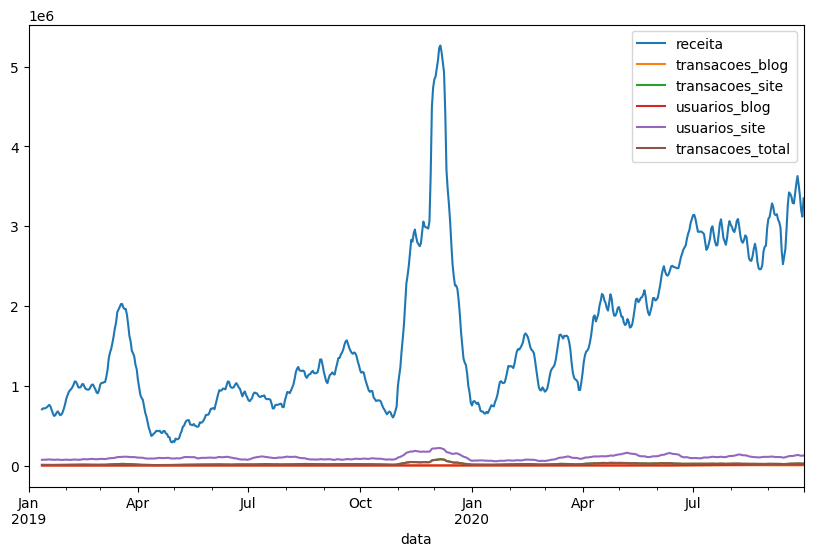

In [ ]:
dados.rolling(12).mean().plot(figsize=(10, 6))

ANALISANDO TENDÊNCIAS

Farei a análise somente das pesquisa sobre receita. Observe que, por conta da ocilação das pesquisas, fica dificil de confirmar qualquer tipo de tendência na frequência de pesquisa. Essas ocilações podem ser provocadas pela sazonalidade das pesquisas ou pela variabilidade natural da mesma. 

Com base na descrição do meu gráfico eu tive a compreensão que o aumento da receita em março até meados de abril indica que existe um impacto positivo em comparação com o período anterior. As ocilações na receita podem indicar flutuações regulares ou aleatórias nas atividades do negócio, ou podem ser influenciadas por fatores externos, como sazonalidade ou mudanças na economia ou mercado. E notei um impacto positivo de aumento de novembro até meados de janeiro por conta do Natal e Ano Novo onde as pessoas compram mais. Então a receita cresci sim e tem um impacto positivo.

<Axes: xlabel='data'>

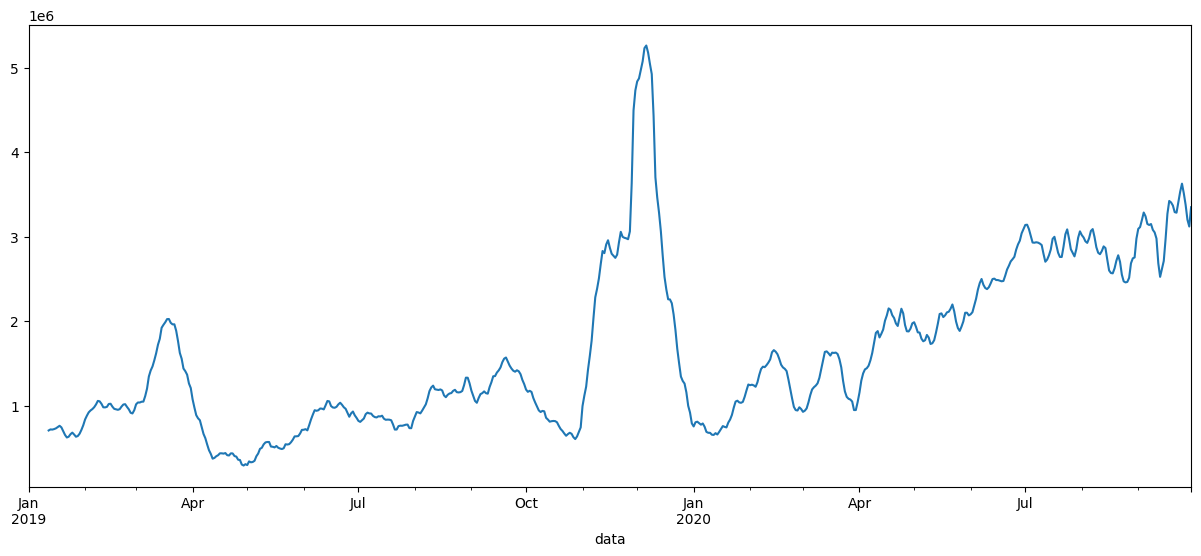

In [ ]:
dados.receita.rolling(12).mean().plot(figsize=(15, 6))

Um aumento em transações do site entre novembro e janeiro pode ser indicativo de que o período de festas de fim de ano, que inclui datas como Black Friday, Natal e Ano Novo, teve um impacto positivo nas vendas do site. Essa é uma época em que muitas pessoas estão dispostas a gastar dinheiro com compras online, e é comum que haja um aumento no volume de transações durante esse período.

No entanto, se após esse período houver oscilações no número de transações, é importante investigar as possíveis causas desse comportamento. Pode ser que as vendas tenham retornado a um patamar mais baixo e estável após o período de festas, ou pode ser que haja algum problema relacionado à estratégia de vendas, ao site ou aos produtos e serviços oferecidos que esteja impactando negativamente as transações. Porém nesse gráfico noto um aumento positivo sendo que o impacto maior de aumento é em período festivos.

<Axes: xlabel='data'>

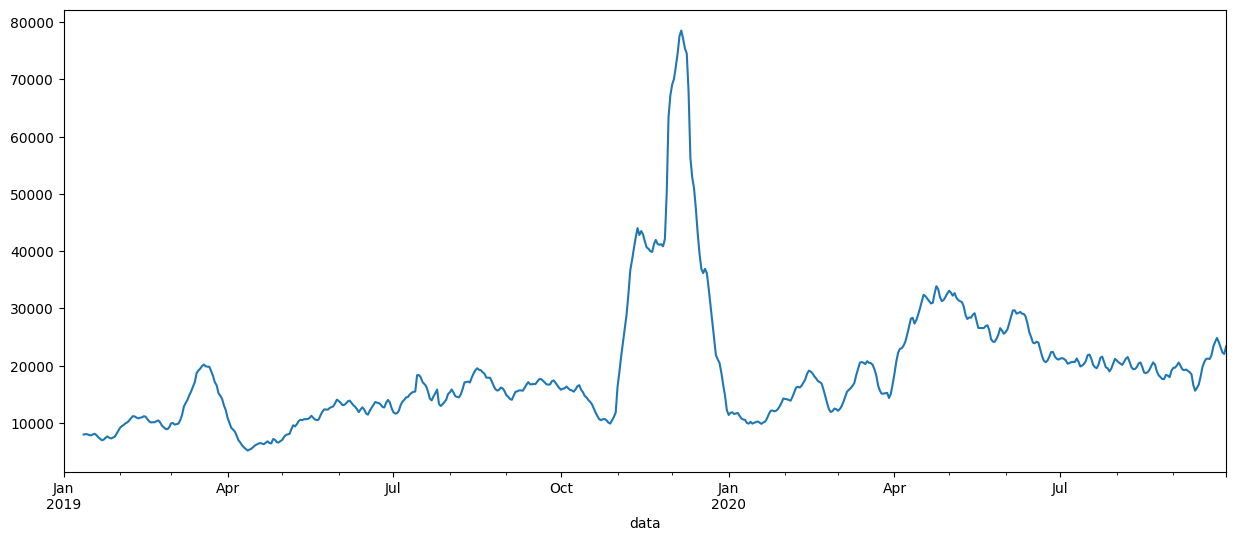

In [ ]:
#Nota-se que por meados de Março até abril teve um aumento nas transacoes do site,
#depois menteve mais constante e por volta de novembro e dezembro houve uma 
#descrepancia muito maior com relação aos meses anteriores subsequentes.

dados.transacoes_site.rolling(12).mean().plot(figsize=(15, 6))

transacoes do blog pode ser perceber que tem um impacto positivo entre usuarios do blog, entre junho até agosto nota se um crescimento. Esse aumento sugere uma maior interação dos usuários com a plataforma, o que pode indicar um maior engajamento e potencial crescimento para o negócio. Pois essa interação só começou em junho, então existe uma correlação entre os números de usuários em um blog, transações financeiras, então minha conclusão é que existe sim um impacto positivo sendo que quando aumenta receita, aumenta também transações_blog, transações_site, usuários_blog, usuários_site e transações_total. 


<Axes: xlabel='data'>

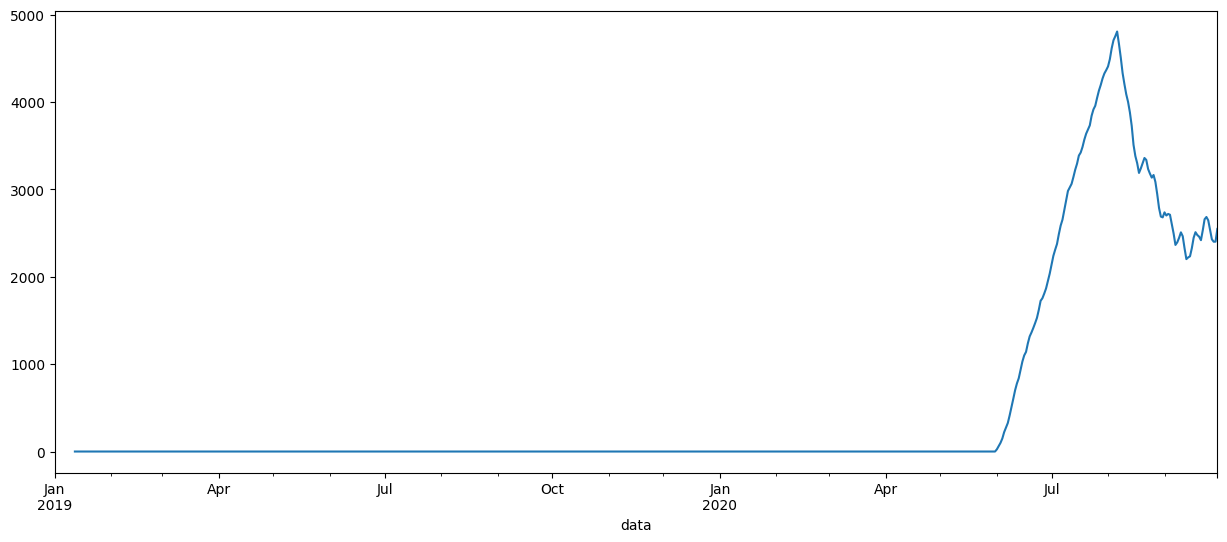

In [ ]:
 dados.transacoes_blog.rolling(12).mean().plot(figsize=(15, 6))

a partir de janeiro até abril pode ser notar uma tendencia de crescimento de usuarios do site, de abril até julho entendo que houve uma ocilação, mais com possiveis aumentos de usuarios que acessaram e interagiram com o site. E em novembro essa interação teve um maior aumento e só em janeiro houve uma queda. Pude perceber que esses aumento ocorre mais em datas comemorativas onde os usuários tem mais interação com o site.

<Axes: xlabel='data'>

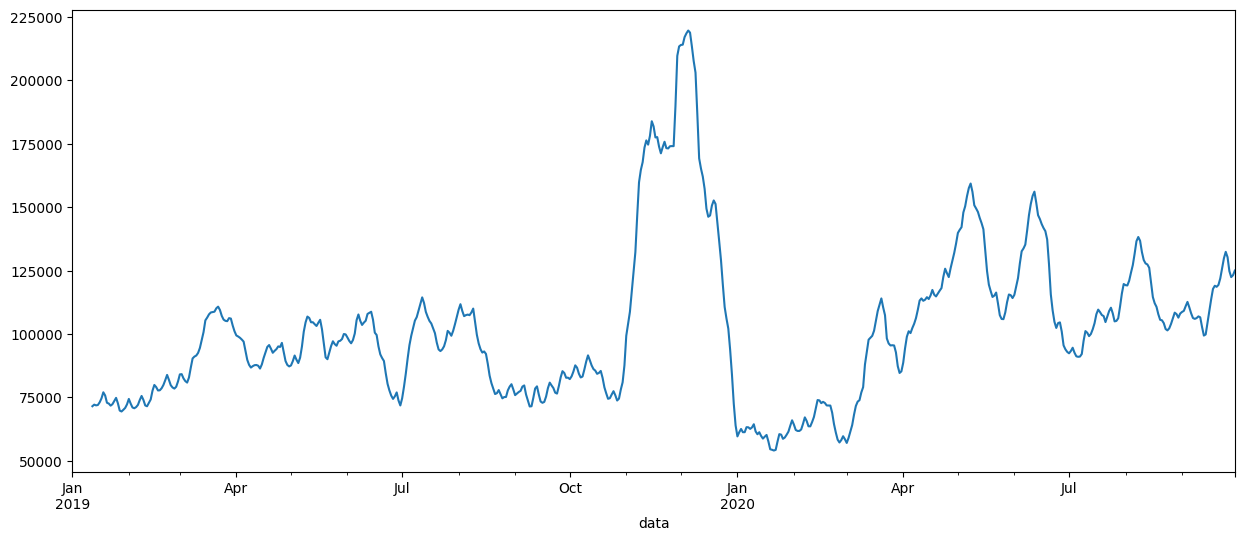

In [ ]:
dados.usuarios_site.rolling(12).mean().plot(figsize=(15, 6))

Aqui nesse gráfico nota-se que houve uma interação de usuários do blog a partir do mês de junho, isso indica que houve um maior interesse do público pelo conteúdo publicado no blog, o que pode gerar mais tráfego e engajamento.

<Axes: xlabel='data'>

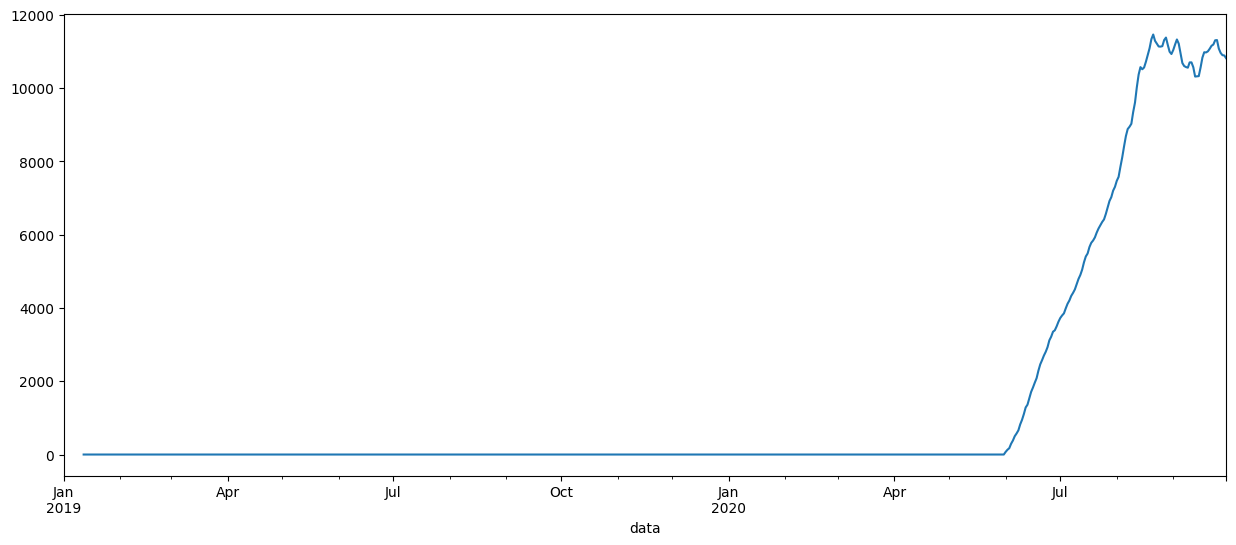

In [ ]:
dados.usuarios_blog.rolling(12).mean().plot(figsize=(15, 6))

Essas linhas de código estão selecionando um período específico de dados de um DataFrame chamado dados e, em seguida, calculando as estatísticas descritivas (média, desvio padrão, mínimo, máximo, etc.) para um subconjunto de colunas.  Essas estatísticas podem ser úteis para entender a distribuição e as características dos dados selecionados e para compará-los com outros períodos ou subconjuntos de dados.

In [ ]:
dados = dados.reset_index()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              639 non-null    datetime64[ns]
 1   receita           639 non-null    int64         
 2   transacoes_blog   639 non-null    int64         
 3   transacoes_site   639 non-null    int64         
 4   usuarios_blog     639 non-null    int64         
 5   usuarios_site     639 non-null    int64         
 6   transacoes_total  639 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 35.1 KB


In [ ]:
dados_periodo = dados.loc[(dados['data'] >= '2020-06-01') & (dados['data'] <= '2020-09-30')]
estatisticas_descritivas = dados_periodo.loc[:, ['receita', 'transacoes_blog',	'transacoes_site',	'usuarios_blog',	'usuarios_site',	'transacoes_total']].describe()
estatisticas_descritivas

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total
count,1.220000e+02,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.921583e+06,2767.344262,21289.852459,7541.500000,115498.426230,24057.245902
std,8.060306e+05,1169.620697,5904.600871,3671.701034,25849.441401,5967.651560
min,1.414351e+06,301.000000,10159.000000,521.000000,64337.000000,12163.000000
25%,2.439980e+06,1913.500000,16574.250000,4325.500000,98879.250000,19565.500000
50%,2.757877e+06,2791.500000,21651.000000,8215.000000,111990.500000,24020.500000
75%,3.327891e+06,3625.250000,24423.000000,10736.750000,129443.750000,27891.250000
max,6.240174e+06,5586.000000,38535.000000,13059.000000,217632.000000,42383.000000


Quando o valor da média é maior que o valor da mediana, isso pode indicar que há alguns valores extremamente altos no conjunto de dados. Isso pode puxar a média para cima, mas não afetará a mediana, que é determinada pelo valor do meio do conjunto de dados. Por exemplo, suponha que tenhamos o conjunto de dados {1, 2, 3, 4, 100}. A média é (1 + 2 + 3 + 4 + 100) / 5 = 22, enquanto a mediana é 3. Nesse caso, a média é muito maior do que a mediana devido ao valor extremamente alto de 100.

Por outro lado, se a média for menor do que a mediana, isso pode indicar que há alguns valores extremamente baixos no conjunto de dados. Isso pode puxar a média para baixo, mas não afetará a mediana, que é determinada pelo valor do meio do conjunto de dados. Por exemplo, suponha que tenhamos o conjunto de dados {1, 2, 3, 4, 5, 100}. A média é (1 + 2 + 3 + 4 + 5 + 100) / 6 = 19, enquanto a mediana é 3,5. Nesse caso, a média é muito menor do que a mediana devido ao valor extremamente alto de 100












In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dados.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total
0,2019-01-01,349184,0,4693,0,46739,4693
1,2019-01-02,867328,0,8501,0,83129,8501
2,2019-01-03,758590,0,9375,0,86067,9375
3,2019-01-04,688873,0,8405,0,69363,8405
4,2019-01-05,441760,0,6136,0,56183,6136


In [ ]:
dados.corr()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total
receita,1.000000,0.531721,0.812644,0.518040,0.711175,0.850970
transacoes_blog,0.531721,1.000000,0.068880,0.893342,0.162275,0.155214
transacoes_site,0.812644,0.068880,1.000000,0.054284,0.819962,0.996226
usuarios_blog,0.518040,0.893342,0.054284,1.000000,0.151805,0.131480
usuarios_site,0.711175,0.162275,0.819962,0.151805,1.000000,0.826073
transacoes_total,0.850970,0.155214,0.996226,0.131480,0.826073,1.000000


In [ ]:
#Os argumentos "annot=True" e "vmin=-1,vmax=1" são opcionais  
#configuram a exibição de valores na matriz de correlação.
# e os limites mínimo e máximo da escala de cores, respectivamente.
#aqui estou calculando a matriz de correlação dos dados.
#quanto mais próximo o valor da correlação estiver de 1, mais forte é a correlação positiva.
#quanto mais próxima o valor da correlação estiver de -1, mais forte é a correlação negativa.


<Axes: >

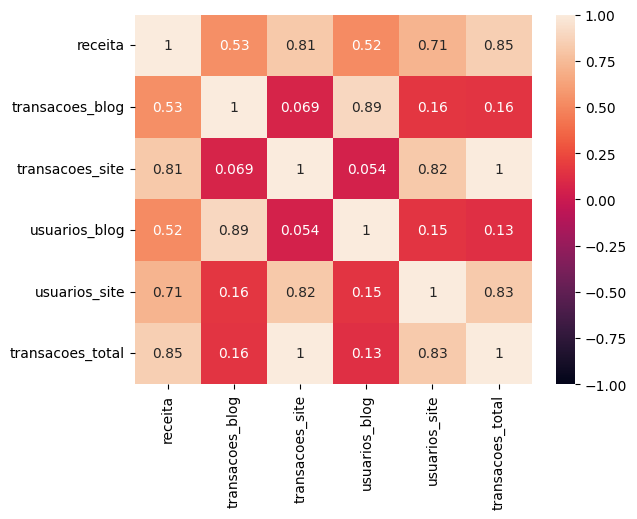

In [ ]:
sns.heatmap(dados.corr(), annot=True, vmin=-1, vmax=1)


In [ ]:
dados['data'] = pd.to_datetime(dados['data'])

In [ ]:
dados.set_index('data',inplace=True)

In [ ]:
dados['data'] = dados.index

In [ ]:
X = dados.index.values.astype(float).reshape(-1, 1)
y = dados['receita'].values
dados

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,transacoes_total,data
data,,,,,,,
2019-01-01,349184,0,4693,0,46739,4693,2019-01-01
2019-01-02,867328,0,8501,0,83129,8501,2019-01-02
2019-01-03,758590,0,9375,0,86067,9375,2019-01-03
2019-01-04,688873,0,8405,0,69363,8405,2019-01-04
2019-01-05,441760,0,6136,0,56183,6136,2019-01-05
...,...,...,...,...,...,...,...
2020-09-26,2509687,1580,15320,9292,96178,16900,2020-09-26
2020-09-27,2182679,1838,14135,10052,103494,15973,2020-09-27
2020-09-28,3496475,2684,21724,11224,127524,24407,2020-09-28


In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
alpha = reg.coef_[0]

In [ ]:
beta = reg.intercept_

In [ ]:
dados['previsto'] =  alpha * X + beta
print("O coeficiente alpha é: ", alpha)
print("O coeficiente beta é: ", beta)
print("A equação da reta de regressão é: Y =", alpha, "X", beta)

O coeficiente alpha é:  4.2186192645716454e-11
O coeficiente beta é:  -64771371.210196435
A equação da reta de regressão é: Y = 4.2186192645716454e-11 X -64771371.210196435


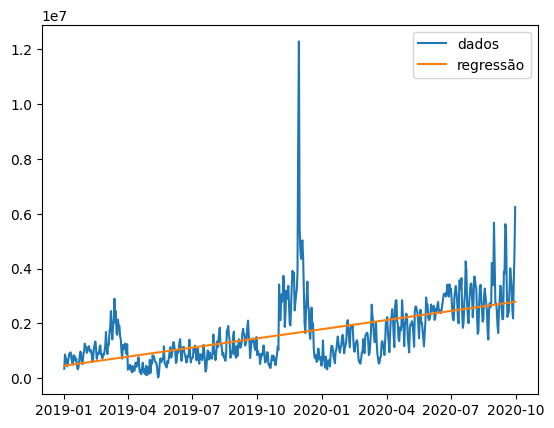

In [ ]:
# Plotando a reta de regressão. Façam esses passos para todas as métricas.

plt.plot(dados.index, dados['receita'], label='dados')
plt.plot(dados.index, dados['previsto'], label='regressão')
plt.legend()
plt.show()

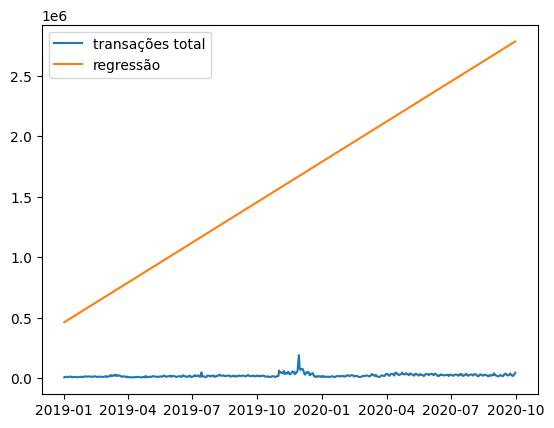

In [ ]:
plt.plot(dados.index, dados['transacoes_total'], label='transações total')
plt.plot(dados.index, dados['previsto'], label='regressão')
plt.legend()
plt.show()

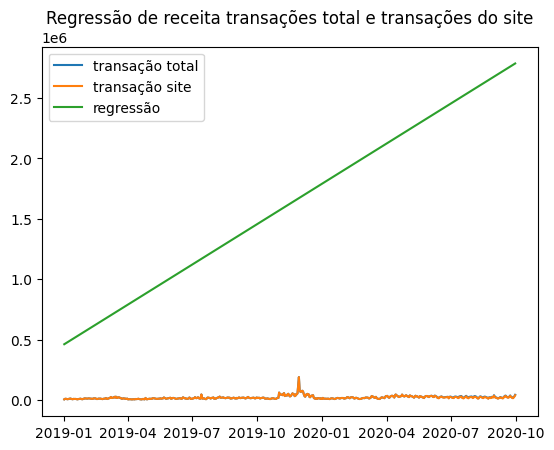

In [ ]:
plt.plot(dados.index, dados['transacoes_total'], label='transação total')
plt.plot(dados.index, dados['transacoes_site'], label='transação site')
plt.plot(dados.index, dados['previsto'], label='regressão')
plt.title('Regressão de receita transações total e transações do site')
plt.legend()
plt.show()

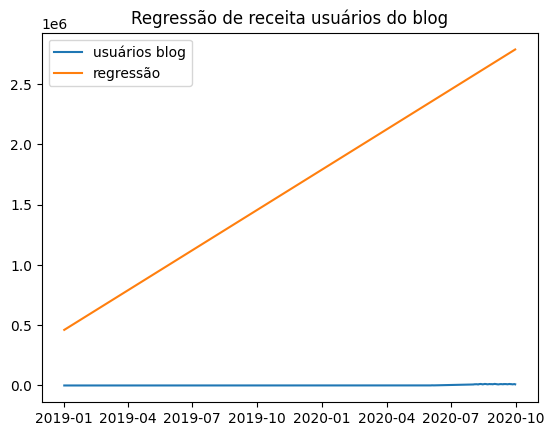

In [ ]:
plt.plot(dados.index, dados['usuarios_blog'], label='usuários blog')
plt.plot(dados.index, dados['previsto'], label='regressão')
plt.legend()
plt.title('Regressão de receita usuários do blog')
plt.show()

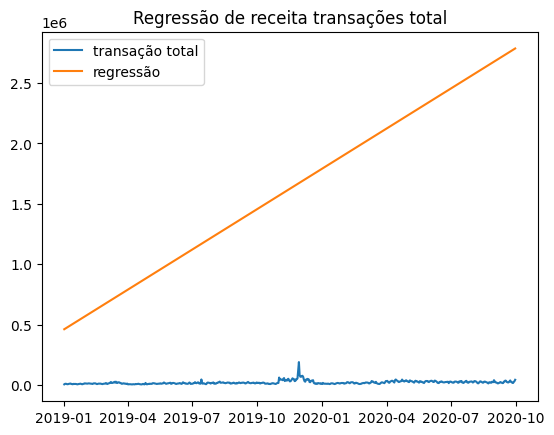

In [ ]:
plt.plot(dados.index, dados['transacoes_total'], label='transação total')
plt.plot(dados.index, dados['previsto'], label='regressão')
plt.title('Regressão de receita transações total')
plt.legend()
plt.show()

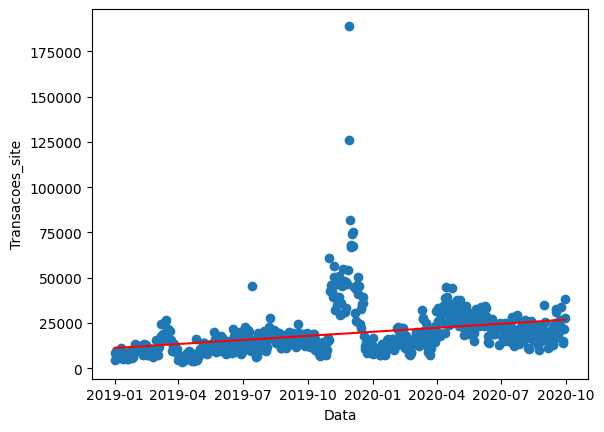

In [ ]:
# Crie um conjunto de dados para a regressão linear
x = (dados.index - dados.index.min()).days.values.reshape(-1, 1)
y = dados['transacoes_site'].values

# Crie um objeto de regressão linear e ajuste-o aos dados
reg = LinearRegression().fit(x, y)

# Calcule as previsões da regressão para os valores de x
y_pred = reg.predict(x)

# Plote os dados e a regressão
plt.scatter(dados.index, y)
plt.plot(dados.index, y_pred, color='red')
plt.xlabel('Data')
plt.ylabel('Transacoes_site')
plt.show()


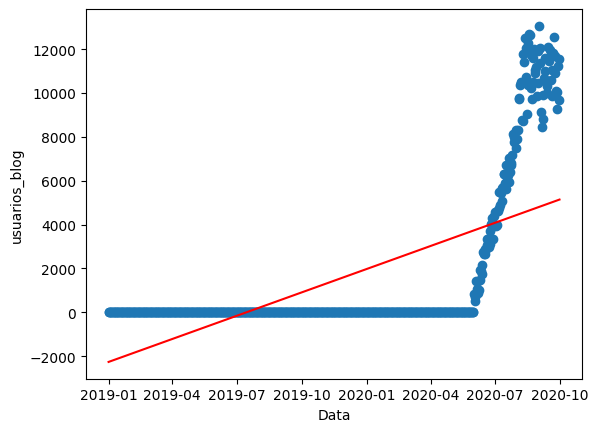

In [ ]:
# Crie um conjunto de dados para a regressão linear
x = (dados.index - dados.index.min()).days.values.reshape(-1, 1)
y = dados['usuarios_blog'].values

# Crie um objeto de regressão linear e ajuste-o aos dados
reg = LinearRegression().fit(x, y)

# Calcule as previsões da regressão para os valores de x
y_pred = reg.predict(x)

# Plote os dados e a regressão
plt.scatter(dados.index, y)
plt.plot(dados.index, y_pred, color='red')
plt.xlabel('Data')
plt.ylabel('usuarios_blog')
plt.show()

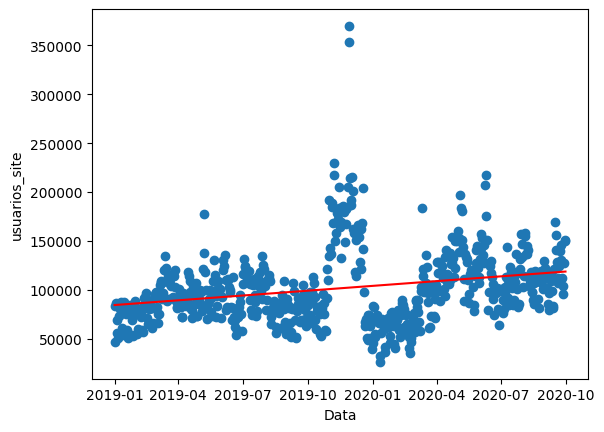

In [ ]:
# Crie um conjunto de dados para a regressão linear
x = (dados.index - dados.index.min()).days.values.reshape(-1, 1)
y = dados['usuarios_site'].values

# Crie um objeto de regressão linear e ajuste-o aos dados
reg = LinearRegression().fit(x, y)

# Calcule as previsões da regressão para os valores de x
y_pred = reg.predict(x)

# Plote os dados e a regressão
plt.scatter(dados.index, y)
plt.plot(dados.index, y_pred, color='red')
plt.xlabel('Data')
plt.ylabel('usuarios_site')
plt.show()

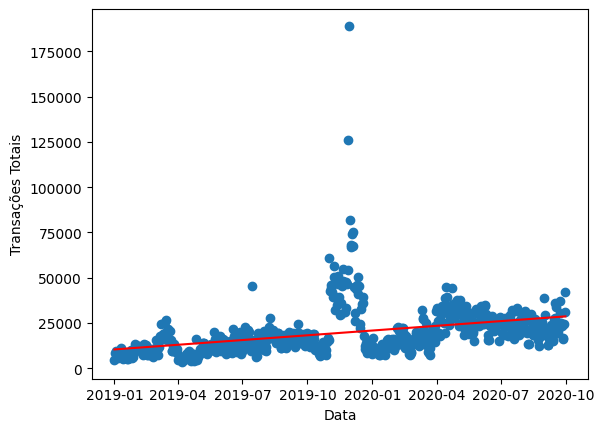

In [ ]:
# Crie um conjunto de dados para a regressão linear
x = (dados.index - dados.index.min()).days.values.reshape(-1, 1)
y = dados['transacoes_total'].values

# Crie um objeto de regressão linear e ajuste-o aos dados
reg = LinearRegression().fit(x, y)

# Calcule as previsões da regressão para os valores de x
y_pred = reg.predict(x)

# Plote os dados e a regressão
plt.scatter(dados.index, y)
plt.plot(dados.index, y_pred, color='red')
plt.xlabel('Data')
plt.ylabel('Transações Totais')
plt.show()